<img src="https://vip.arizona.edu/images/logoviplab.png"/>

## <center> <font color='blue'>BE/BAT 485/585</font> </center>
 In this exercise, you will:<br>
 -  read data from a BSQ file
 - Extract and Slice this 3D DataCube, and extract
1. Pixels from all bands
2. Along a row  (Horizontal slice)
3. along a Columns (Vertical slice)
4. Random lines (in any direction)
5. Annotate the locations of these extracts 

In [1]:
# load library modules 
import os
import numpy as np
import matplotlib.pyplot as plt

#Notice this is a new library with additonal functionality 
# Can you follow prior instruction form prvious lab work and move the library 
# to the lobrary folder and refer to it from there !?
import viplab_lib2 as vip  # This is an updated version of our library

In [3]:
# Starts main program
#subset file information
filename="../Data/NEON_GreenValley.bsq"
nrows=500
ncols=500
nbands=426
datatype=np.int16

In [4]:
# Read all bands into a single 3D DataCube

# Notice the -426  in the call and that means load all bands (all 426 of them)

DataCube=vip.BSQ_band_read(filename,-426,nrows,ncols)

# Assign some of the bands to band/color names that are easier to remember instaead of listing numbers
# Remember these could be from any neighboring bands also since this is hyperspectral 
bandRED=48
bandGREEN=34
bandBLUE=17
bandNIR=97

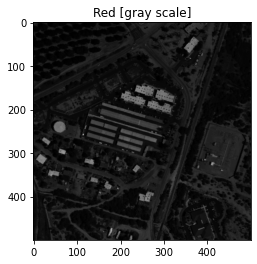

In [5]:
#Display a single layer/band from the DataCube and Dislay as gray scale
plt.figure()
plt.title('Red [gray scale]')
plt.imshow(DataCube[:,:,bandRED],cmap='gray')

## <font color="blue">Learn to manipulate the image display using statistcial information</font>

In [6]:
# So letsw get ssome info abotu the image 
Num_Rows, Num_Col= np.shape(DataCube[:,:,bandRED])
print('Image width:  ', Num_Rows)
print('Image height: ', Num_Col)
print('Image Max Value: ', np.max(DataCube[:,:,bandRED]))
print('Image Min Value: ', np.min(DataCube[:,:,bandRED]))
print('Image Min Value: ', np.mean(DataCube[:,:,bandRED]))  # Notice the value versus Min and MAx

Image width:   500
Image height:  500
Image Max Value:  15307
Image Min Value:  0
Image Min Value:  1392.179816


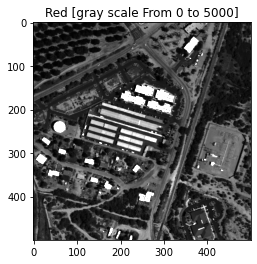

In [7]:
#Using the info from above (min, max, avearge) we can manipulate the image display 
# For example display a single layer/band from the DataCube as gray scale but stretched properly
# We do so by using the vmin and vmax parameters that basically force the image to display all data between those values

plt.figure()
plt.title('Red [gray scale From 0 to 5000]')
plt.imshow(DataCube[:,:,bandRED],cmap='gray', vmin=0,vmax=5000)

# Color scale available for grey scale images 

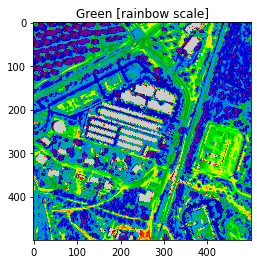

In [8]:
#Display the same layer as a color scale - See previous lab for cmap refeences 
plt.figure()
plt.title('Green [rainbow scale]')
plt.imshow(DataCube[:,:,bandGREEN],cmap='nipy_spectral',vmin=0,vmax=3000)

Creating RGB Image...


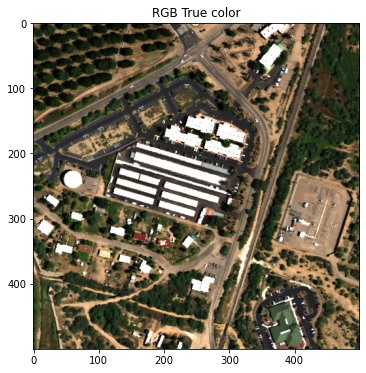

In [9]:
# Combine the Red, Green and Blue data into an RGB image
print("Creating RGB Image...")
RGBImage=vip.Image_getRGB(DataCube[:,:,bandRED],DataCube[:,:,bandGREEN],DataCube[:,:,bandBLUE],8000)
# Display RGB True color Image
plt.figure(figsize=(10,6))
plt.title('RGB True color')
plt.imshow(RGBImage)

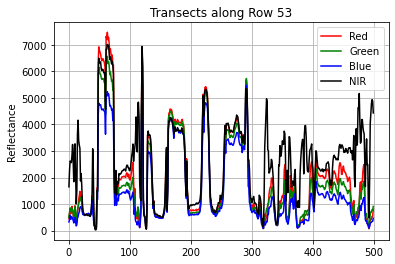

In [10]:
# Extract data along Row 240 
# Extract the data from different bands
# Notice how the data is extracted - this is called slicing 
# 53 refers to the row number and : refers to all pixels along that row
# bandXXXX refers to the band/layer that we defined earlier

Row_Red=DataCube[240,:,bandRED]
Row_Green=DataCube[240,:,bandGREEN]
Row_Blue=DataCube[240,:,bandBLUE]
Row_NIR=DataCube[240,:,bandNIR]
plt.figure()
plt.title('Transects along Row 53')
plt.ylabel('Reflectance')
plt.plot(Row_Red,color='red',label='Red')
plt.plot(Row_Green,color='green',label='Green')
plt.plot(Row_Blue,color='blue',label='Blue')
plt.plot(Row_NIR,color='black',label='NIR')
plt.grid()
plt.legend(loc='upper right')

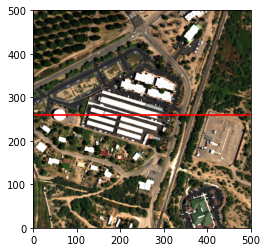

In [11]:
# create an image to show where is the transect 
fig, ax = plt.subplots()
x = range(500)
y=np.array([])
for i in range(500):
    y=np.append(y,500-240)
ax.imshow(RGBImage, extent=[0, 500, 0, 500])
ax.plot(x, y, '-', linewidth=2, color='red', alpha=0.8)

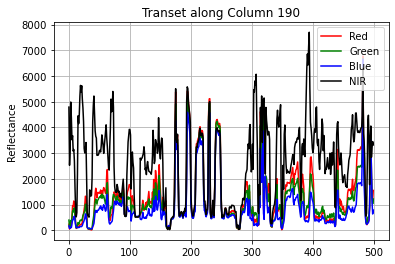

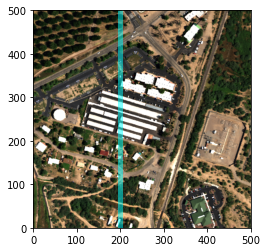

In [12]:
# Column 190 crosses several features too
# Lets extract the data for all bands along this column
# Notice how we sliced this time - Along the column
Col_Red=DataCube[:,190,bandRED]
Col_Green=DataCube[:,190,bandGREEN]
Col_Blue=DataCube[:,190,bandBLUE]
Col_NIR=DataCube[:,190,bandNIR]

plt.figure()
plt.title('Transet along Column 190')
plt.ylabel('Reflectance')
plt.plot(Col_Red,color='red',label='Red')
plt.plot(Col_Green,color='green',label='Green')
plt.plot(Col_Blue,color='blue',label='Blue')
plt.plot(Col_NIR,color='black',label='NIR')
plt.legend(loc='upper right')

plt.grid()
plt.legend(loc='upper right')

# create an image to show where is the transect 
fig, ax = plt.subplots()
y = range(500)
x=np.array([])
for i in range(500):
    x=np.append(x,199)
ax.imshow(RGBImage, extent=[0, 500, 0, 500])
ax.plot(x, y, '-', linewidth=5, color='cyan', alpha=0.5)


## Now try to understand what the following code is doing and what kind of useful info we are extracting

<function TextIOWrapper.close()>

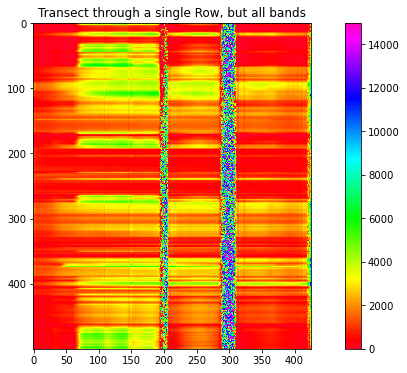

In [13]:
# for the same row, extract a profile through all bands now - remember this is hyperspctral data 
# So lots of bands will show up and notice the slicing approach 
# We only defined the Row = 100 and used all columns [:] and all bands [:]

Profile=DataCube[100,:,:]
plt.figure(figsize=(12,6))
plt.title('Transect through a single Row, but all bands')
plt.imshow(Profile,cmap='gist_rainbow')
plt.colorbar()

# Read the wavelength values from the textfile
file = open('../Data/NEON_wavelength_values.txt', 'r') 
Xvalues= file.readlines() 
nvalues=len(Xvalues)

#convert text to number (float)
for i in range(0,nvalues):
  Xvalues[i]=float(Xvalues[i]) 

# close text file
file.close

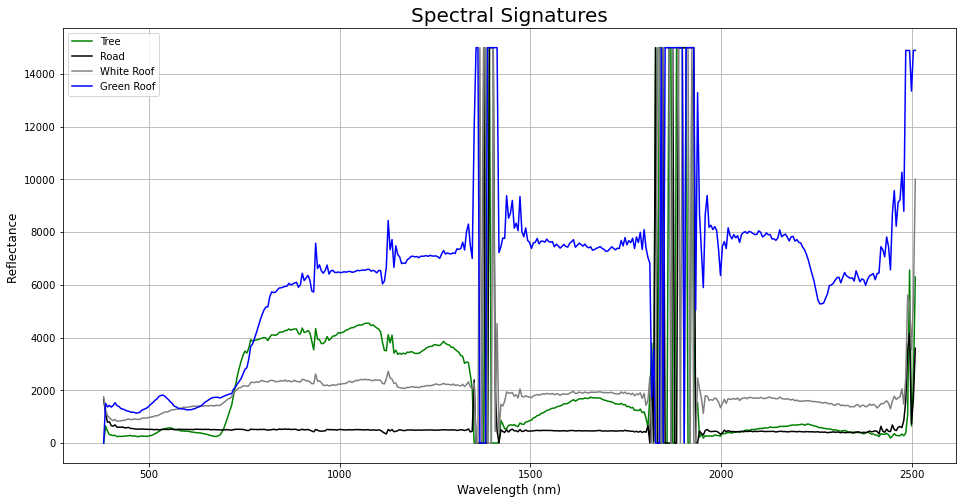

In [14]:
# Extract a single pixel through all bands now to develop a spectral signature
# Example:
Tree_Spectra=DataCube[70,85,:]
Road_Spectra=DataCube[100,200,:]
White_Roof_Spectra=DataCube[120,265,:]
Green_Roof_Spectra=DataCube[445,388,:]

plt.figure(figsize=(16,8))
plt.title('Spectral Signatures',fontsize=20)
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Reflectance ',fontsize=12)
plt.plot(Xvalues,Tree_Spectra,color='green',label='Tree')
plt.plot(Xvalues,Road_Spectra,color='black',label='Road')
plt.plot(Xvalues,White_Roof_Spectra,color='grey',label='White Roof')
plt.plot(Xvalues,Green_Roof_Spectra,color='blue',label='Green Roof')

plt.grid()
plt.legend(loc='upper left')


# <font color="red">Homework: To do </font>
* Your job is now is to extract a transect through a diangonal line 
* Plot the data and label it (indictae location of transect) on the image 

In [16]:
#display a message to know the program ended
print("program ended.")

program ended.
